In [51]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", palette="pastel")
sns.set_style("whitegrid")

In [25]:
results_directory = Path('.')
# Return a list of regular files only, not directories
file_list = [f for f in results_directory.glob('*') if f.is_file() and f.suffix == '.csv']

rows = []
for file in file_list:
  nc = int(file.name.replace('.csv', '').replace('nc', ''))
  row = pd.read_csv(file, header=1).drop('0', axis='columns')
  row['nc'] = pd.Series([nc])
  rows.append(row)

df = pd.concat(rows).sort_values('nc').reset_index(drop=True)
df.head()

,mag-f1,mesh-f1,co-view-map,co-view-ndcg,co-read-map,co-read-ndcg,cite-map,cite-ndcg,co-cite-map,co-cite-ndcg,recomm-adj-NDCG,recomm-adj-P@1,nc
0,76.38,75.54,83.17,91.31,83.94,92.08,86.89,94.07,87.49,94.35,53.33,19.41,50
1,77.48,79.97,83.42,91.42,84.23,92.26,87.34,94.36,87.78,94.57,53.47,19.42,75
2,79.18,83.14,83.54,91.45,84.38,92.35,87.69,94.53,87.97,94.68,53.48,19.46,100
3,79.71,83.63,83.53,91.46,84.46,92.40,87.91,94.66,88.14,94.80,53.82,19.60,150
4,80.10,84.14,83.63,91.51,84.46,92.37,88.18,94.78,88.18,94.81,53.97,20.12,200


In [26]:
df['cls'] = (df['mesh-f1'] + df['mag-f1'])/2
df['user-activity'] = (df['co-cite-map'] + df['co-cite-ndcg'] + df['co-read-map'] + df['co-read-ndcg'] + df['cite-map'] + df['cite-ndcg'] + df['co-cite-map'] + df['co-cite-ndcg'])/8
df['recomm'] = (df['recomm-adj-NDCG'] + df['recomm-adj-P@1'])/2
df

,mag-f1,mesh-f1,co-view-map,co-view-ndcg,co-read-map,co-read-ndcg,cite-map,cite-ndcg,co-cite-map,co-cite-ndcg,recomm-adj-NDCG,recomm-adj-P@1,nc,cls,user-activity,recomm
0,76.38,75.54,83.17,91.31,83.94,92.08,86.89,94.07,87.49,94.35,53.33,19.41,50,75.960,90.08250,36.370
1,77.48,79.97,83.42,91.42,84.23,92.26,87.34,94.36,87.78,94.57,53.47,19.42,75,78.725,90.36125,36.445
2,79.18,83.14,83.54,91.45,84.38,92.35,87.69,94.53,87.97,94.68,53.48,19.46,100,81.160,90.53125,36.470
3,79.71,83.63,83.53,91.46,84.46,92.40,87.91,94.66,88.14,94.80,53.82,19.60,150,81.670,90.66375,36.710
4,80.10,84.14,83.63,91.51,84.46,92.37,88.18,94.78,88.18,94.81,53.97,20.12,200,82.120,90.72125,37.045
5,80.74,84.66,83.68,91.55,84.47,92.39,88.22,94.81,88.19,94.82,53.94,19.83,300,82.700,90.73875,36.885
6,80.61,85.14,83.65,91.52,84.43,92.37,88.29,94.87,88.24,94.86,54.06,20.17,400,82.875,90.77000,37.115
7,81.10,85.39,83.66,91.52,84.47,92.40,88.29,94.88,88.16,94.81,54.05,20.18,500,83.245,90.74750,37.115
8,81.27,85.44,83.64,91.50,84.44,92.37,88.30,94.88,88.14,94.80,54.04,20.16,600,83.355,90.73375,37.100
9,81.46,85.52,83.63,91.50,84.45,92.39,88.29,94.88,88.13,94.79,54.13,20.27,700,83.490,90.73125,37.200


c:\Users\giaco\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\giaco\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\giaco\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\giaco\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

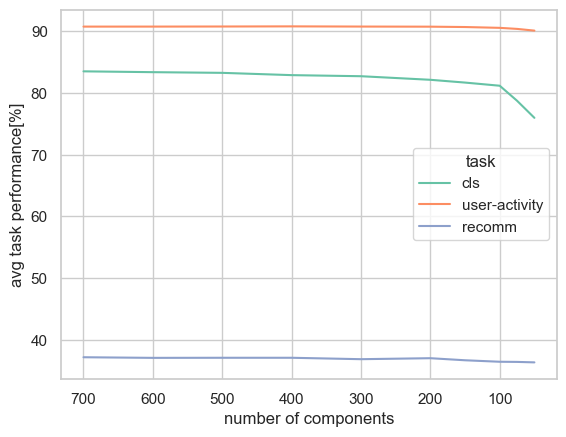

In [55]:
display_df = df[['cls', 'user-activity', 'recomm', 'nc']]
ax = sns.lineplot(x='nc', y='value', hue='task', 
             data=pd.melt(display_df, ['nc'], var_name='task'),
             palette=sns.palettes.color_palette('Set2'))
plt.xlabel('number of components')
plt.ylabel('avg task performance[%]')
ax.invert_xaxis()